In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import local_functions
import model_operations
import sensor_info

In [38]:
test_file = '/pdata4/archive/GPM/1C_ATMS_V7/1904/190407/1C.NPP.ATMS.XCAL2019-V.20190407-S070847-E085016.038560.V07A.HDF5'
#test_file = '/edata1/archive/GPM/1C_F15_V7/0508/050807/1C.F15.SSMI.XCAL2018-V.20050807-S180848-E195032.029213.V07A.HDF5'

#data = local_functions.read_atms_l1c(test_file)
import importlib; importlib.reload(model_operations)
mlflag = model_operations.ml_quality_control(test_file, error_threshold=4)

In [40]:
chan_desc = np.array(sensor_info.channel_descriptions)
chan_desc

array(['24QV', '31QV', '88QV', '166QH', '183+-7QH', '183+-5QH',
       '183+-3QH', '183+-2QH', '183+-1QH'], dtype='<U8')

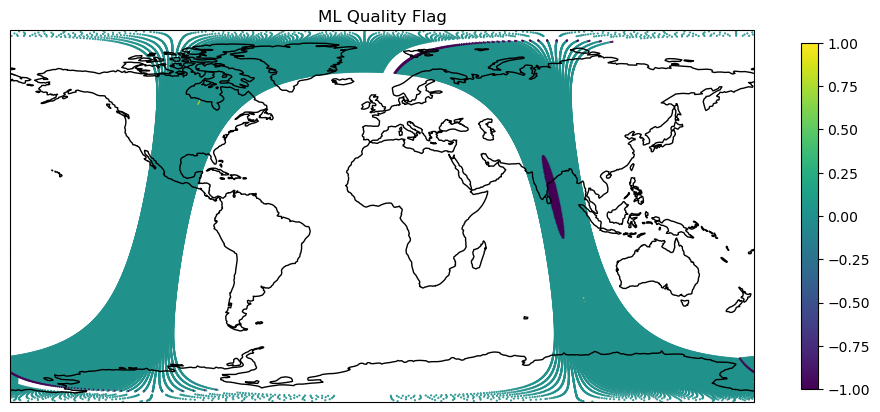

In [41]:
'''
Plot the flag
'''



chan = ['24QV']

chan_desc = np.array(sensor_info.channel_descriptions)
chan_indx = np.where(chan == chan_desc)[0]

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
im = ax.scatter(data['lon'], data['lat'], c=mlflag[:,chan_indx], transform=ccrs.PlateCarree(), s=0.3)
plt.colorbar(mappable=im, shrink=0.45)
plt.title('ML Quality Flag')
ax.coastlines()
plt.show()